# Análise do perfil acadêmico/demográfico + histórico escolar dos discentes do curso de computação
**Objetivo:** Realizar análises descritivas, exploratórias e inferenciais, além de aplicar testes estatísticos para validar hipóteses sobre evasão e desempenho dos estudantes do curso de Ciência da Computação.

### Súmario
1. [Carga e preparação dos dados](#dados)
    - 1.1. [Análise Exploratória](#eda)
2. [Perfil dos alunos](#perfil)
    - 2.1. [Distribuição por sexo, raça, faixa etária, estado civil, nacionalidade.](#distribuiçao)
    - 2.2. [Proporção de evasão vs conclusão por perfil demográfico.](#proporçao)
    - 2.3. [Análise de correlação entre coeficiente de rendimento e evasão.](#analise)
3. [Trajetória acadêmica](#trajetoria)
    - 3.1. [Taxa média de aprovação/reprovação por disciplina.](#taxa)
    - 3.2. [Identificação de disciplinas gargalo (com maior índice de reprovação).](#identificao)
    - 3.3. [Evolução do desempenho do aluno por período (notas e faltas).](#evolucao)
    - 3.4. [Relação entre reprovações acumuladas e evasão.](#relacao)
4. [Comparação entre grupos](#comp)
    - 4.1. [Diferenças no coeficiente de rendimento por sexo, raça, tipo de ingresso.](#difeCoeficiente)
    - 4.2. [Diferença entre evasão por forma de ingresso (ENEM, transferência, e tipos de Cotas).](#difeEvasao)
5. [Testes estatísticos recomendados](#teste)
    - 5.1. [Comparações de médias](#media)
    - 5.2. [Associação entre variáveis catégoricas](#associacao)
    - 5.3. [Correlação](#corr)
    - 5.4. [Comparação de distribuições](#comp)
    - 5.5. [Modelagem estatística](#model)
6. [Conclusão Final](#conclusao)

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<a id='dados'></a>
## 1. Carga e preparação dos dados
Nesta seção, carregamos os três datasets necessários (`alunos_ativos`, `alunos_inativos`, `historico_escolar`)

### Vamos utilizar os datasets
- **alunos_ativos.csv:** Contém informações sobre os alunos que estão atualmente ativos na instituição.
- **alunos_inativos.csv:** Conjunto de dados contém informações sobre os alunos que não estão mais ativos na instituição.
- **historico_escolar.csv:** Conjunto de dados detalha o histórico acadêmico dos alunos, com informações sobre as disciplinas cursadas.

In [74]:
alunosAtivos = pd.read_csv('alunos_ativos.csv')
alunosInativos = pd.read_csv('alunos_inativos.csv') 
histEscolar = pd.read_csv('historico_escolar.csv')

<a id='eda'></a>
### 1.1 Análise Exploratória (EDA)
Realizamos uma análise exploratória para entender a distribuição dos dados, verificar valores nulos, duplicados e tratar inconsistências.

In [75]:
display(alunosAtivos.head())
display(alunosInativos.head())
display(histEscolar.head())

,Data Nascimento,Sexo,Raça,Estrangeiro,Nacionalidade,Naturalidade,UF Naturalidade,Período,Situação atual,Data ocorrência,Estrutura,Período ingresso,Tipo ingresso,IMI,Coeficiente,Tipo de demanda,rga_anonimo
0,2000-01-14,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,ARAGARCAS,GO,20232,MATRICULADO NO PERÍODO,2023-11-16,20191,20181,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),56.7,5.49,L6 - Estudante preto pardo ou indígena de esco...,af05b362ddb9224c4589b23cbf119b60ce7e26300b6a3a...
1,1997-04-26,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSE DO JACUIPE,BA,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),35.8,4.42,Ampla Concorrência,208844f5f871e3b92a344f0a6f7782b209872e5667ea13...
2,1999-09-04,Masculino,Negra,Não,BRASILEIRO,BARRA DO GARCAS,MT,20232,MATRICULADO NO PERÍODO,2023-12-01,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),50.1,5.93,Ampla Concorrência,157770a9bd112bd511d5fed47b295121e2be2e9d082f84...
3,1994-06-05,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSÉ DO XINGU,MT,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20131,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),59.7,7.03,L4 - Estudante preto pardo ou indígena de esco...,71260f57df37913cf04b8a5f882737c071c9313b201158...
4,2004-05-24,Feminino,Branca,Não,BRASILEIRO,GOIANIA,GO,20232,AFASTAMENTO POR TRANCAMENTO DE MATRICULA,2023-11-30,20191,20221,INGRESSO POR PROCESSO SELETIVO ESPECÍFICO,50.8,4.78,Ampla Concorrência,d517234d3868dee3fc27d4ff1dee463e9d68b45d51ad22...


,Data Nascimento,Sexo,Raça,Estrangeiro,Nacionalidade,Naturalidade,UF Naturalidade,Período,Situação atual,Data ocorrência,Estrutura,Período ingresso,Tipo ingresso,IMI,Coeficiente,Tipo de demanda,rga_anonimo
0,1993-05-08,Masculino,Branca,Não,BRASILEIRO,ARAGARCAS,GO,20161,EXCLUSÃO POR DESLIGAMENTO - RESOLUÇÃO CONSEPE ...,2016-06-27,20091,20111,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),3.8,1.63,NaN,c31ebda923a730829336347280e50dcf10d35aa6f7de02...
1,1988-02-06,Feminino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,PARAGOMINAS,PA,20221,EXCLUSAO POR CONCLUSAO (FORMADO),2023-02-10,20191,20141,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),68.6,6.95,L4 - Estudante preto pardo ou indígena de esco...,8a417431c97e7d34315177679327cc45414bbf093d4f07...
2,1991-11-26,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,BARRA DO GARCAS - MT,MT,20131,EXCLUSAO POR CONCLUSAO (FORMADO),2013-09-19,20091,20091,INGRESSO POR TRANSFERENCIA DE REGIME,0.0,4.47,NaN,b251f5c111876bb185fdaf7f58535b4a6f3c8e924ab679...
3,1995-01-23,Masculino,Negra,Não,BRASILEIRO,BARRA DO GARCAS,MT,20192,EXCLUSÃO POR DESLIGAMENTO - RESOLUÇÃO CONSEPE ...,2019-11-12,20191,20161,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),0.0,0.00,L4 - Estudante preto pardo ou indígena de esco...,bf92b6a19e2b440d38ce69047587601b82314875b4d0f3...
4,1986-12-25,Masculino,Branca,Não,BRASILEIRO,MARABA,PA,20222,EXCLUSAO POR DESISTENCIA,2023-04-24,20191,20221,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),0.0,0.00,Ampla Concorrência,8beccafee2f40a099063c8631c8ecb1b760240d502e0e4...


,Ano,Código,Nome da Disciplina,CH,CR,TU,MF,FA,SF,SE,rga_anonimo,Disciplina,Grupo de Disciplinas,Tipo de Disciplina,Optativa
0,2010/1,72100022,FUNDAMENTOS DE MATEMÁTICA,64,4,CC,3.3,6,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Fundamentos de Matemática,Fundamentos de Matemática,Matemática,Não
1,2010/1,72100023,GEOMETRIA ANALÍTICA E VETORIAL,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Geometria Analítica e Vetorial,Geometria,Matemática,Não
2,2010/1,70400377,Lógica Matemática e Elementos de Lógica Digital,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Lógica Digital,Lógica Digital,Computação,Não
3,2010/1,70400375,Programação I,96,6,CC,4.6,4,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Programação I,Programação,Computação,Não
4,2010/1,72000016,Práticas de Leitura e Produção de Textos,96,6,CC,7.1,4,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Práticas de Leitura e Produção de Texto,Práticas de Leitura e Produção de Texto,Linguagens,Não


In [76]:
print(f"Linhas e colunas do dataset alunosAtivos: {alunosAtivos.shape}")
print(f"Linhas e colunas do dataset alunosInativos: {alunosInativos.shape}")
print(f"Linhas e colunas do dataset histEscolar: {histEscolar.shape}")

Linhas e colunas do dataset alunosAtivos: (220, 17)
Linhas e colunas do dataset alunosInativos: (498, 17)
Linhas e colunas do dataset histEscolar: (19528, 15)


In [77]:
print(f"Informações do dataset alunosAtivos:\n{alunosAtivos.info()}\n")
print(f"Informações do dataset alunosInativos:\n{alunosInativos.info()}\n")
print(f"Informações do dataset histEscolar:\n{histEscolar.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data Nascimento   220 non-null    object 
 1   Sexo              220 non-null    object 
 2   Raça              220 non-null    object 
 3   Estrangeiro       220 non-null    object 
 4   Nacionalidade     220 non-null    object 
 5   Naturalidade      220 non-null    object 
 6   UF Naturalidade   220 non-null    object 
 7   Período           220 non-null    int64  
 8   Situação atual    220 non-null    object 
 9   Data ocorrência   220 non-null    object 
 10  Estrutura         220 non-null    int64  
 11  Período ingresso  220 non-null    int64  
 12  Tipo ingresso     220 non-null    object 
 13  IMI               220 non-null    float64
 14  Coeficiente       220 non-null    float64
 15  Tipo de demanda   219 non-null    object 
 16  rga_anonimo       220 non-null    object 
dt

In [78]:
#Consultando valores nulos
print(f"Valores nulos no dataset alunosAtivos:\n{alunosAtivos.isnull().sum()}\n")
print(f"Valores nulos no dataset alunosInativos:\n{alunosInativos.isnull().sum()}\n")
print(f"Valores nulos no dataset historicoEscolar:\n{histEscolar.isnull().sum()}\n")

Valores nulos no dataset alunosAtivos:
Data Nascimento     0
Sexo                0
Raça                0
Estrangeiro         0
Nacionalidade       0
Naturalidade        0
UF Naturalidade     0
Período             0
Situação atual      0
Data ocorrência     0
Estrutura           0
Período ingresso    0
Tipo ingresso       0
IMI                 0
Coeficiente         0
Tipo de demanda     1
rga_anonimo         0
dtype: int64

Valores nulos no dataset alunosInativos:
Data Nascimento       0
Sexo                  0
Raça                  0
Estrangeiro           0
Nacionalidade         0
Naturalidade         16
UF Naturalidade      38
Período               0
Situação atual        0
Data ocorrência      34
Estrutura             0
Período ingresso      0
Tipo ingresso         0
IMI                   0
Coeficiente           0
Tipo de demanda     191
rga_anonimo           0
dtype: int64

Valores nulos no dataset historicoEscolar:
Ano                     0
Código                  0
Nome da Discipl

In [79]:
# Consultando valores duplicados
print(f"Valores duplicados no dataset alunosAtivos: {alunosAtivos.duplicated().sum()}")
print(f"Valores duplicados no dataset alunosInativos: {alunosInativos.duplicated().sum()}")
print(f"Valores duplicados no dataset historicoEscolar: {histEscolar.duplicated().sum()}")

Valores duplicados no dataset alunosAtivos: 0
Valores duplicados no dataset alunosInativos: 0


Valores duplicados no dataset historicoEscolar: 0


<a id='teste'></a>
## 5. Testes estatísticos recomendados

### Merge
Antes de realizar os testes precisamos agrupar os alunos ativos e inativos para diferenciar quem é evadido e quem é concluinte.

In [80]:
# Adicionar coluna de status (Ativo/Inativo)
alunosAtivos['Status'] = 'Ativo'
alunosInativos['Status'] = 'Inativo'

# Combinar os datasets de alunos ativos e inativos
alunos = pd.concat([alunosAtivos, alunosInativos], ignore_index=True)

# Padronizar os valores da situação
alunos['Situação atual'] = alunos['Situação atual'].str.upper()

# Classificar a situação em Concluinte, Evadido ou Cursando
def classificar_situacao(situacao):
    if 'CONCLUSAO' in situacao:
        return 'Concluinte'
    elif 'DESLIGAMENTO' in situacao or 'DESISTENCIA' in situacao:
        return 'Evadido'
    else:
        return 'Cursando'

alunos['Grupo'] = alunos['Situação atual'].apply(classificar_situacao)

# Calcular número total de faltas por aluno
faltas_por_aluno = histEscolar.groupby('rga_anonimo')['FA'].sum().reset_index()
faltas_por_aluno.rename(columns={'FA': 'Total_Faltas'}, inplace=True)

# Unir total de faltas com dataset principal
alunos_merged = alunos.merge(faltas_por_aluno, on='rga_anonimo', how='left')

# Visualizar resultado
alunos_merged.head()


,Data Nascimento,Sexo,Raça,Estrangeiro,Nacionalidade,Naturalidade,UF Naturalidade,Período,Situação atual,Data ocorrência,Estrutura,Período ingresso,Tipo ingresso,IMI,Coeficiente,Tipo de demanda,rga_anonimo,Status,Grupo,Total_Faltas
0,2000-01-14,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,ARAGARCAS,GO,20232,MATRICULADO NO PERÍODO,2023-11-16,20191,20181,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),56.7,5.49,L6 - Estudante preto pardo ou indígena de esco...,af05b362ddb9224c4589b23cbf119b60ce7e26300b6a3a...,Ativo,Cursando,153.0
1,1997-04-26,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSE DO JACUIPE,BA,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),35.8,4.42,Ampla Concorrência,208844f5f871e3b92a344f0a6f7782b209872e5667ea13...,Ativo,Cursando,854.0
2,1999-09-04,Masculino,Negra,Não,BRASILEIRO,BARRA DO GARCAS,MT,20232,MATRICULADO NO PERÍODO,2023-12-01,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),50.1,5.93,Ampla Concorrência,157770a9bd112bd511d5fed47b295121e2be2e9d082f84...,Ativo,Cursando,470.0
3,1994-06-05,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSÉ DO XINGU,MT,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20131,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),59.7,7.03,L4 - Estudante preto pardo ou indígena de esco...,71260f57df37913cf04b8a5f882737c071c9313b201158...,Ativo,Cursando,508.0
4,2004-05-24,Feminino,Branca,Não,BRASILEIRO,GOIANIA,GO,20232,AFASTAMENTO POR TRANCAMENTO DE MATRICULA,2023-11-30,20191,20221,INGRESSO POR PROCESSO SELETIVO ESPECÍFICO,50.8,4.78,Ampla Concorrência,d517234d3868dee3fc27d4ff1dee463e9d68b45d51ad22...,Ativo,Cursando,63.0


<a id='media'></a>
### 5.1. Comparações de média
- **t-Teste de Student (independente)** → comparar coeficiente de rendimento médio entre **evadidos e concluintes.**

Tamanho do grupo Evadidos: 169
Tamanho do grupo Concluintes: 111


Text(0, 0.5, 'Frequência')

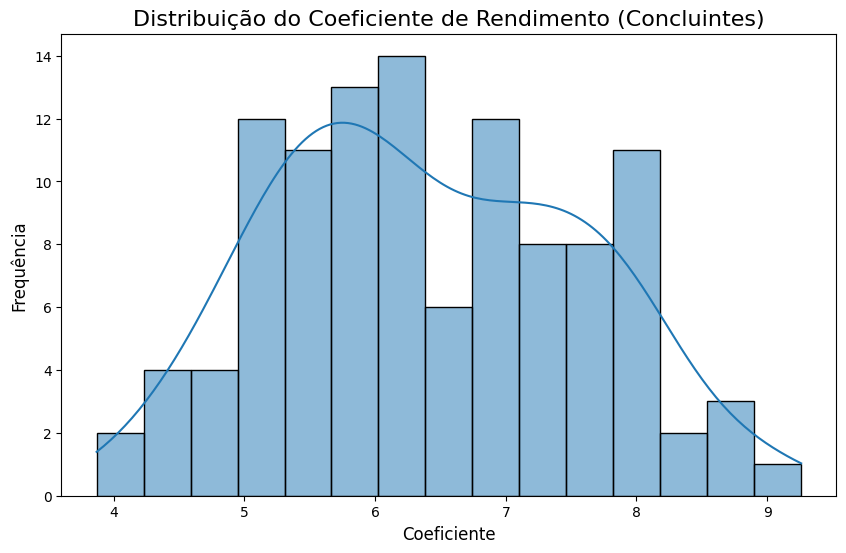

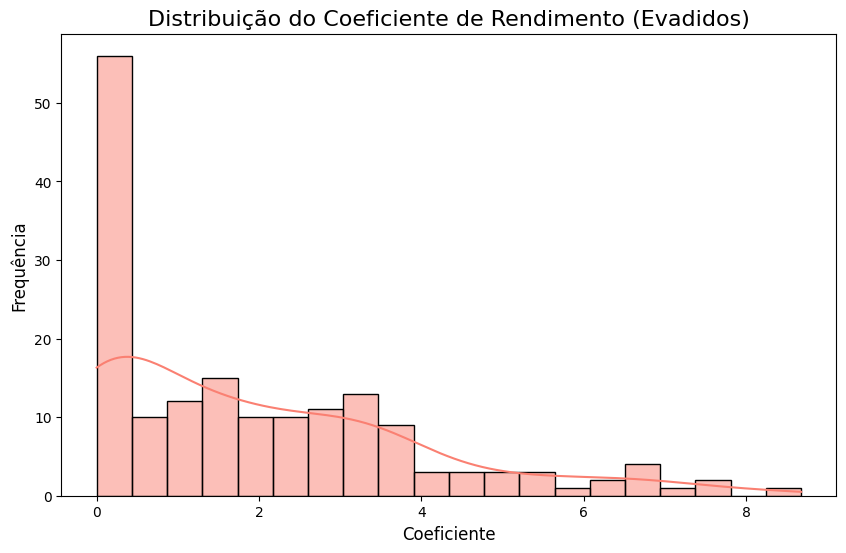

In [81]:
# Separar os grupos
evadidos = alunos_merged[alunos_merged['Grupo'] == 'Evadido']['Coeficiente'].dropna()
concluintes = alunos_merged[alunos_merged['Grupo'] == 'Concluinte']['Coeficiente'].dropna()

#contar o tamnanho dos grupos
print(f"Tamanho do grupo Evadidos: {len(evadidos)}")
print(f"Tamanho do grupo Concluintes: {len(concluintes)}")  

# Separar os dados em duas amostras
coef_concluintes = alunos[alunos['Grupo'] == 'Concluinte']['Coeficiente'].dropna()
coef_evadidos = alunos[alunos['Grupo'] == 'Evadido']['Coeficiente'].dropna()

# Histograma para Concluintes
plt.figure(figsize=(10, 6))
sns.histplot(coef_concluintes, kde=True, bins=15)
plt.title('Distribuição do Coeficiente de Rendimento (Concluintes)', fontsize=16)
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Histograma para Evadidos
plt.figure(figsize=(10, 6))
sns.histplot(coef_evadidos, kde=True, bins=20, color='salmon')
plt.title('Distribuição do Coeficiente de Rendimento (Evadidos)', fontsize=16)
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

- **ANOVA (ou Kruskal–Wallis, se não normal)** → comparar rendimento entre diferentes **tipos de ingresso** ou **estruturas curriculares.**

--- Teste de Kruskal-Wallis: Coeficiente por Tipo de Ingresso ---
Estatística do teste: 8.8046
P-valor: 0.1171
Resultado: Não há evidência de uma diferença significativa no Coeficiente entre os diferentes Tipos de Ingresso.


/tmp/ipykernel_4891/117445079.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analise, x='Tipo ingresso', y='Coeficiente', palette='viridis')


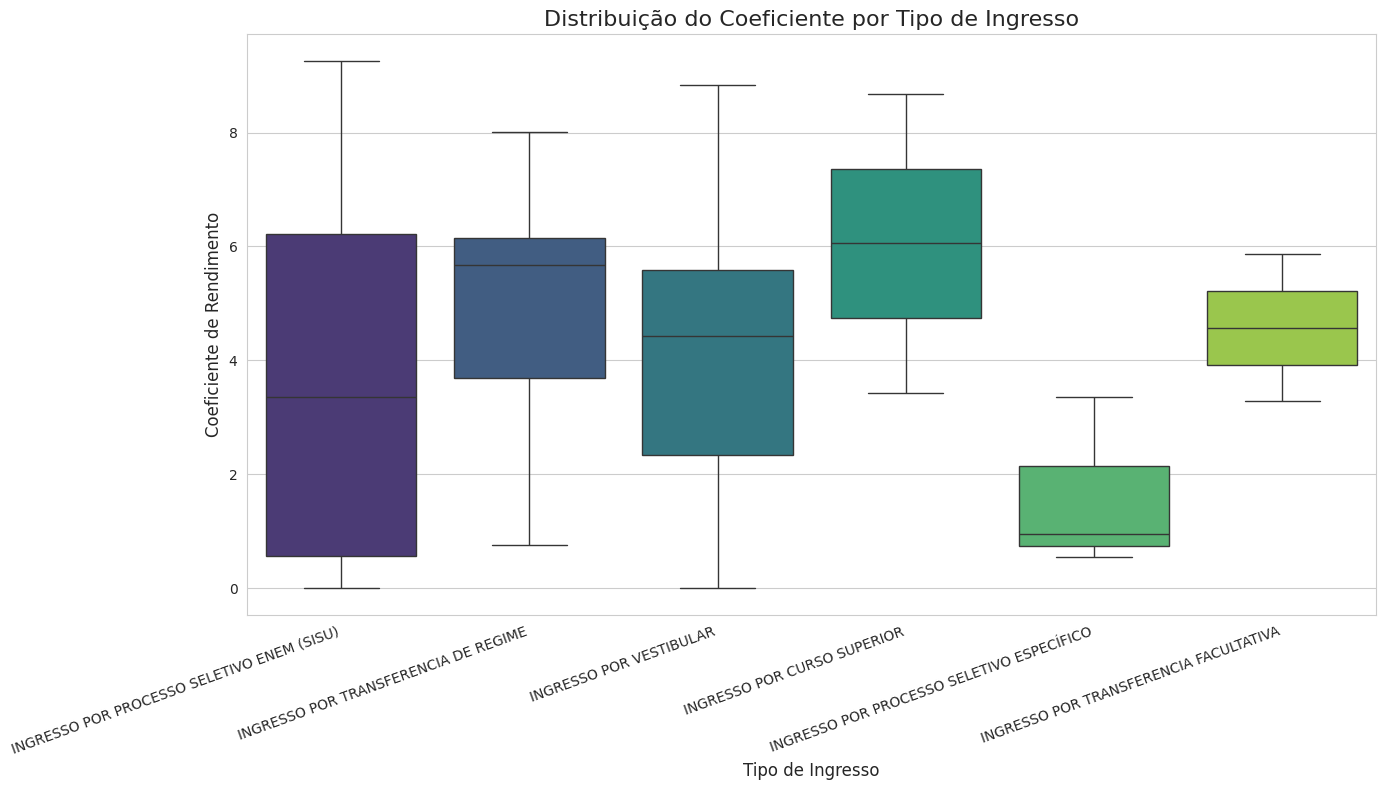

In [ ]:
# Remover linhas onde o coeficiente é nulo para o teste
df_analise = alunos_merged.dropna(subset=['Coeficiente', 'Tipo ingresso']).copy()

# Executar o Teste de Kruskal-Wallis pois os dados não seguem uma distribuição normal
# Criar uma lista de amostras de 'Coeficiente' para cada 'Tipo de ingresso'
grupos = [df_analise['Coeficiente'][df_analise['Tipo ingresso'] == tipo] for tipo in df_analise['Tipo ingresso'].unique()]

# Executar o teste
statistic, p_value = stats.kruskal(*grupos)

print("--- Teste de Kruskal-Wallis: Coeficiente por Tipo de Ingresso ---")
print(f"Estatística do teste: {statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("Resultado: Há uma diferença estatisticamente significativa no Coeficiente entre os diferentes Tipos de Ingresso.")
else:
    print("Resultado: Não há evidência de uma diferença significativa no Coeficiente entre os diferentes Tipos de Ingresso.")

# --- Etapa 3: Criar a Melhor Visualização (Box Plot) ---
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

sns.boxplot(data=df_analise, x='Tipo ingresso', y='Coeficiente', palette='viridis')

plt.title('Distribuição do Coeficiente por Tipo de Ingresso', fontsize=16)
plt.xlabel('Tipo de Ingresso', fontsize=12)
plt.ylabel('Coeficiente de Rendimento', fontsize=12)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

<a id='associacao'></a>
### 5.2. Associação entre variáveis categóricas
- **Qui-quadrado de independência** → testar se **evasão está associada a sexo, raça, tipo de ingresso, estado civil.**

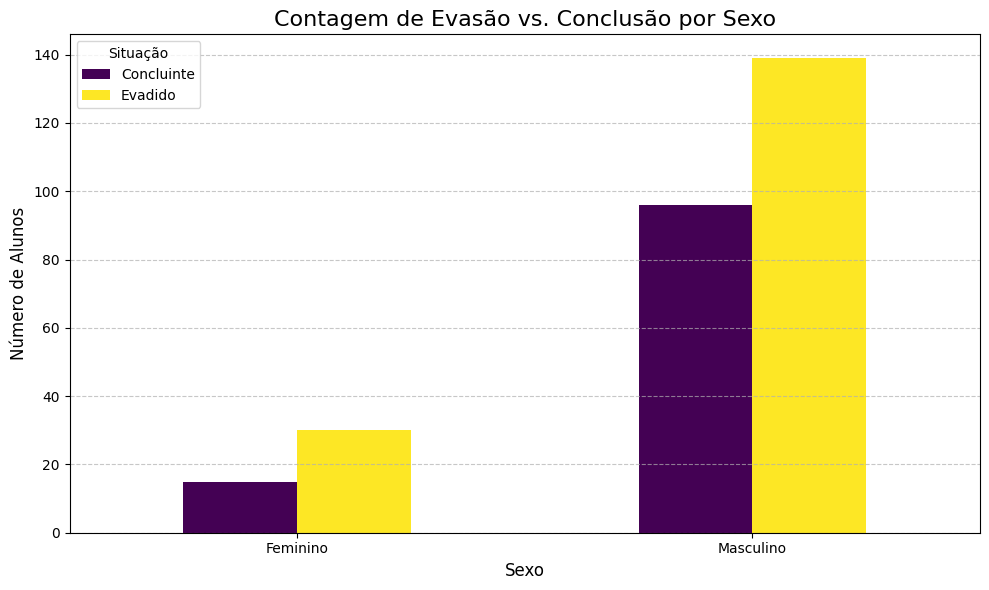

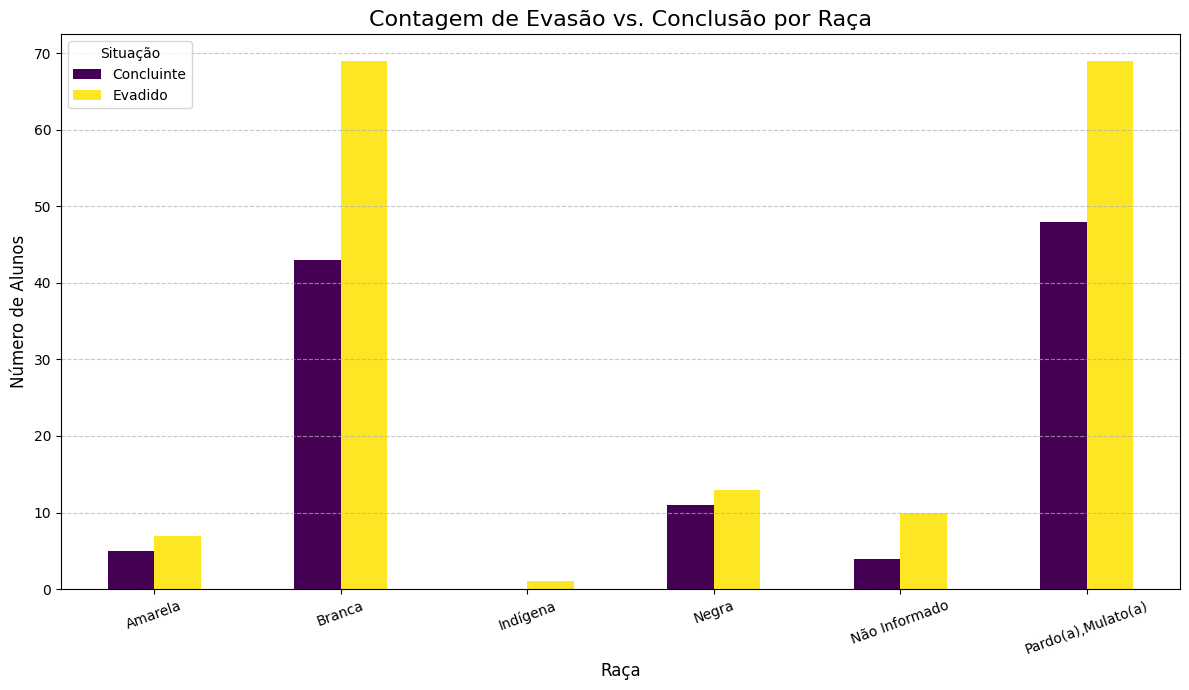

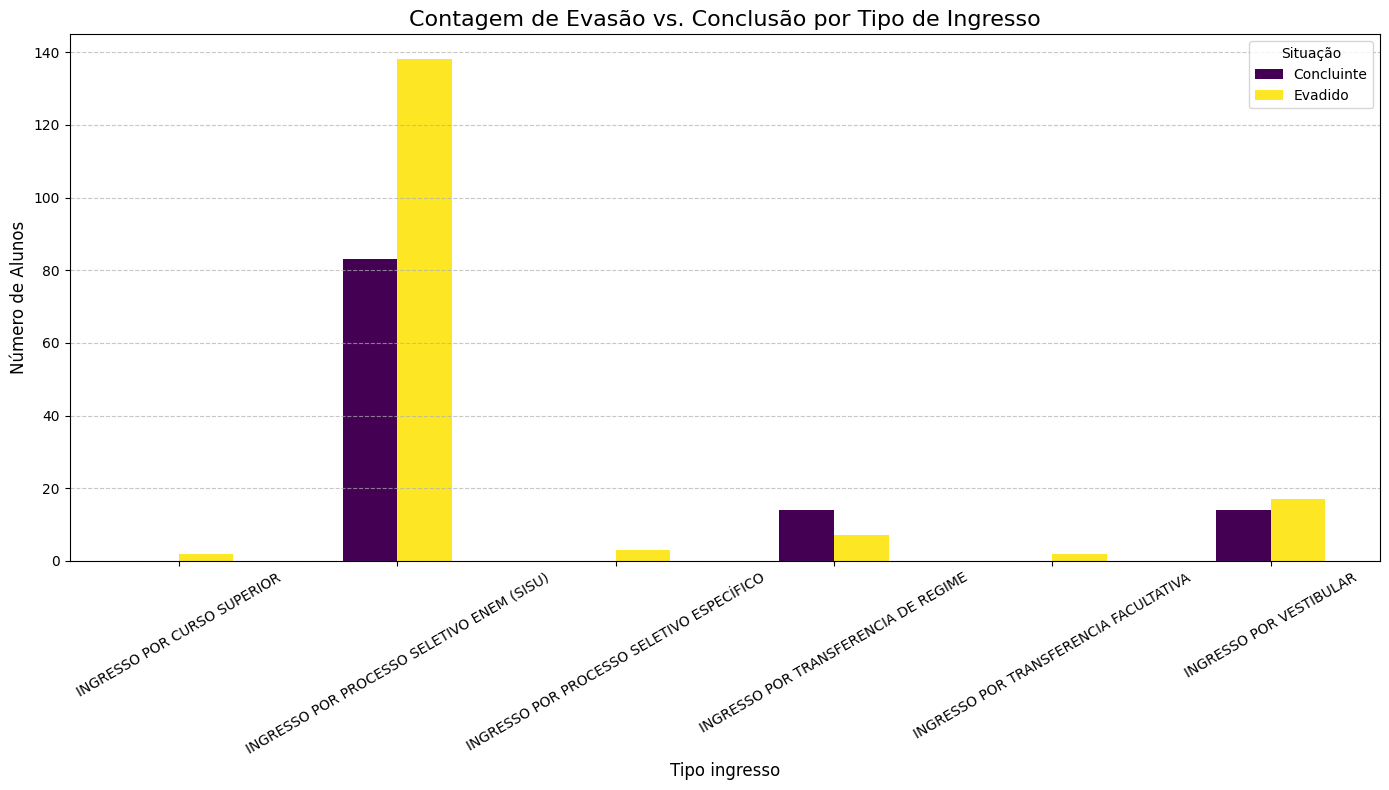

In [ ]:
alunos_merged['SituacaoEvasao'] = alunos_merged['Situação atual'].apply(classificar_situacao)
alunos_merged = alunos_merged[alunos_merged['SituacaoEvasao'].isin(['Evadido', 'Concluinte'])].copy()

# Função para criar os gráficos agrupado

def plot_grouped_bar(column_name, title, figsize=(10, 6), rotation=0): # Essa função cria e salva gráficos de barras agrupadas, passa como parâmetros o nome da coluna, título do gráfico, tamanho da figura e rotação dos rótulos do eixo x
    """Cria um gráfico de barras agrupadas.""" 
    # Cria a tabela de contingência
    contingency_table = pd.crosstab(alunos_merged[column_name], alunos_merged['SituacaoEvasao']) # Tabela cruzada entre a coluna especificada e a situação de evasão
    
    # Cria o gráfico
    contingency_table.plot(kind='bar', stacked=False, figsize=figsize, colormap='viridis')
    
    plt.title(title, fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Número de Alunos', fontsize=12)
    plt.xticks(rotation=rotation)
    plt.legend(title='Situação')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

# Gerar os novos gráficos

# Gráfico para Sexo
plot_grouped_bar('Sexo', 'Contagem de Evasão vs. Conclusão por Sexo')

# Gráfico para Raça
plot_grouped_bar('Raça', 'Contagem de Evasão vs. Conclusão por Raça', figsize=(12, 7), rotation=20)

# Gráfico para Tipo de Ingresso
plot_grouped_bar('Tipo ingresso', 'Contagem de Evasão vs. Conclusão por Tipo de Ingresso', figsize=(14, 8), rotation=30)

<a id='corr'></a>
### 5.3. Correlação

- **Spearman** → se a relação não for linear ou variáveis ordinais.

In [97]:
dados_validos = alunos_merged[['Coeficiente', 'Total_Faltas']].dropna()
spearman_corr, spearman_p = stats.spearmanr(dados_validos['Coeficiente'], dados_validos['Total_Faltas'])
print(f"Correlação de Spearman: r={spearman_corr:.3f}, p={spearman_p:.10f}")

# Interpretação com base no valor de p
if spearman_p < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")

Correlação de Spearman: r=-0.368, p=0.0000000007
A correlação é estatisticamente significativa.


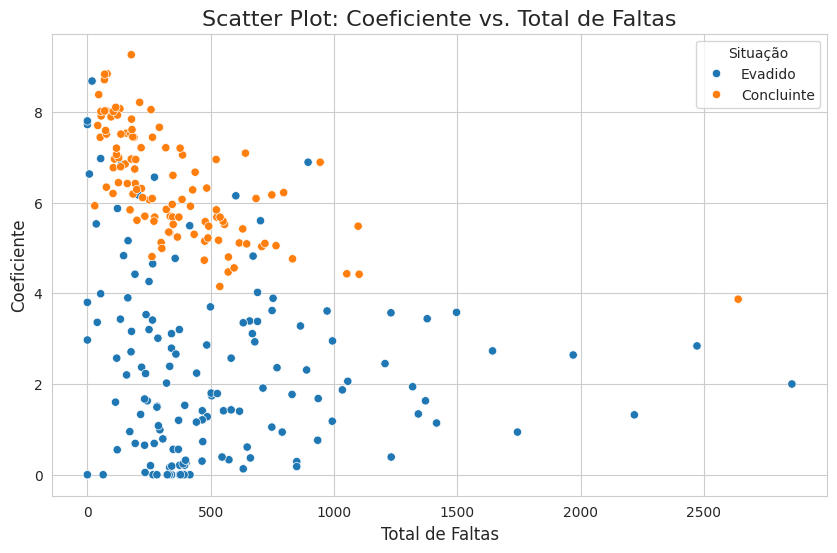

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=alunos_merged, x='Total_Faltas', y='Coeficiente', hue='SituacaoEvasao')
plt.title('Scatter Plot: Coeficiente vs. Total de Faltas', fontsize=16)
plt.xlabel('Total de Faltas', fontsize=12)
plt.ylabel('Coeficiente', fontsize=12)
plt.legend(title='Situação')
plt.grid(True)
plt.show()

Revelou que, embora fraca, existe uma relação estatisticamente significativa onde mais Faltas estão associadas a um menor Coeficiente. A visualização foi a prova definitiva, mostrando dois "universos" de alunos: os concluintes agrupados na zona de alto coeficiente e os evadidos na zona de baixo coeficiente.

<a id='comp'></a>
### 5.4. Comparação de distribuições

- Mann-Whitney U → comparar coeficientes entre dois grupos (ex.: evadidos vs concluintes) quando não há normalidade.

- Kolmogorov–Smirnov (K-S test) → comparar distribuição de notas de disciplinas entre evadidos e concluintes.

<a id='model'></a>
### 5.5. Modelagem estatística
- **Regressão logística** → prever evasão a partir de variáveis demográficas + acadêmicas.

- **Análise de sobrevivência (Kaplan-Meier / Cox Regression)** → modelar o tempo até a evasão.